# PRIYA DEOKAR

# SIMPLE LINEAR REGRESSION

Simple linear regression is a regression model that estimates the relationship between one independent variable and one dependent variable. In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
In this case "Scores" is dependent variable and "Hours" is independent variable.


In [14]:
# Importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [8]:
# Importing data
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

Data imported successfully


In [16]:
data.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Basic Statistics 

In [17]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualisation

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

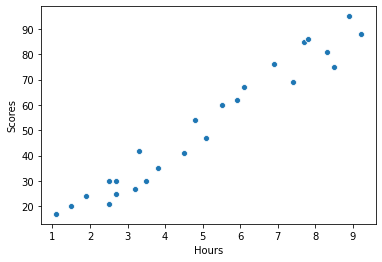

In [19]:
# Scatter plot
sns.scatterplot(x="Hours",y="Scores", data=data)

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

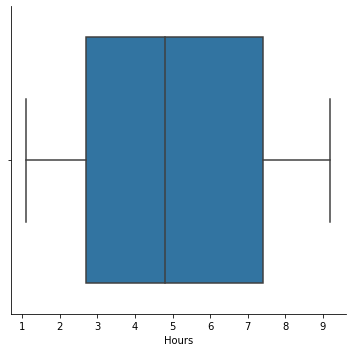

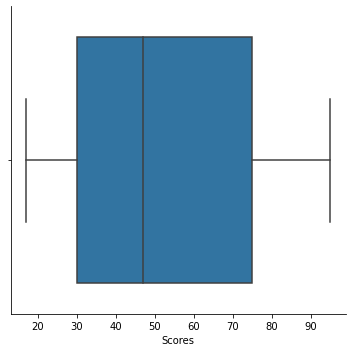

In [25]:
sns.catplot("Hours", data=data, kind="box")
sns.catplot("Scores", data=data, kind="box")

**No outlier present in the data**

In [28]:
# correlation
corr=data.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

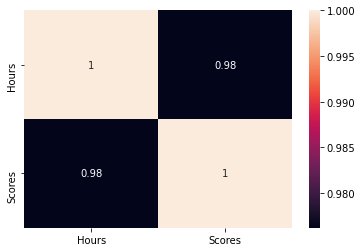

In [34]:
sns.heatmap(corr, annot=True)


**From the Heatmap we can say, there is strong Positive Correlation between Hours and Scores**

<AxesSubplot:xlabel='Scores'>

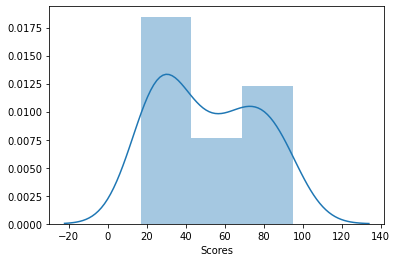

In [38]:
sns.distplot(data["Scores"])

# Preparing the data

In [44]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

# Train Test Split

In [46]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training Algorithm 

In [56]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [55]:
print(regressor.intercept_)

2.018160041434669


In [57]:
print(regressor.coef_)

[9.91065648]


# Predictions

In [58]:
y_pred = regressor.predict(X_test) # Predicting the scores

In [59]:
# Actual vs Predictd
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


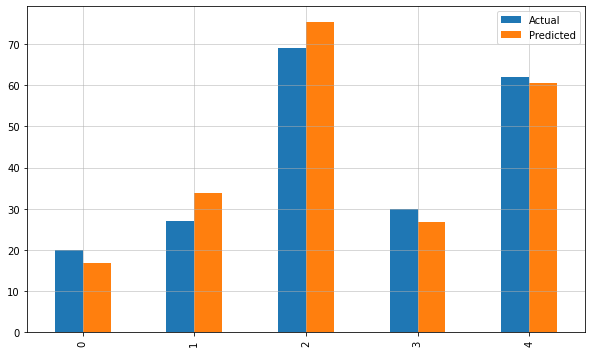

In [66]:
df.plot(kind="bar",figsize=(10,6))
plt.grid(which='major', linestyle="-", linewidth="0.5")
plt.grid(which='minor', linestyle=":", linewidth="0.5")
plt.show()

**From the graph we can say that predicted percentages atr close to the actual values**

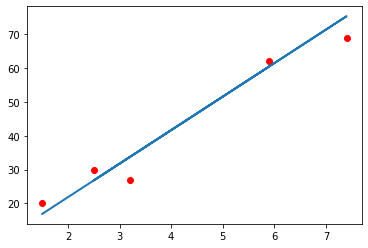

In [75]:
plt.scatter(X_test,y_test, color="red")
plt.plot(X_test, y_pred, linewidth=2)

**Straight line in the graph shows algorithm is correct**

# Predicting Score if student studies 9.25hrs/day 

In [90]:
hours=9.25
pred = regressor.predict([[hours]])
pred
print("Number of study hours", hours)
print("Predicted score", format(pred[0]))



Number of study hours 9.25
Predicted score 93.69173248737538


# Evaluating Algorithm

In [93]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 4.18385989900298
Mean Squared Error: 21.598769307217413
Root Mean Squared Error: 4.647447612100368


In [95]:
from scipy import stats
slope,inter,r,p,std=stats.linregress(y_test, y_pred)
print("R-Squared Value", r)

R-Squared Value 0.9806835759589494


**Here R-Squared Value is 0.9806 Means the model explains 98.06% of variability in the dependent variable(Scores) by independent variable(Hours)**